In [1]:
import numpy as np,pandas as pd
import Split
import IV_Calculation
import Importance_selection
import data_clean
import sklearn_fs
import coherence_selection

In [5]:
from sklearn import  datasets

data= datasets.load_iris()

x=data.data
y=data.target

y[y!=1]=0

X=pd.DataFrame(x,columns=['a','b','c','d'])
z=X.copy()
X['lable']=y

# 对数据进行最优分箱的操作


In [5]:
bins=Split.Split(min_sample = 4,max_node_number = 6) 

In [6]:
bins.fit(X,'lable')

{'a': [5.450000047683716,
  4.8500001430511475,
  5.049999952316284,
  6.25,
  5.6499998569488525,
  7.049999952316284],
 'b': [2.950000047683716,
  2.450000047683716,
  2.25,
  2.850000023841858,
  3.350000023841858,
  3.149999976158142],
 'c': [2.449999988079071, 4.75, 4.450000047683716, 5.049999952316284],
 'd': [0.800000011920929, 1.75, 1.3499999642372131, 1.8499999642372131]}

# 对数据进行IV值的计算

In [10]:
IV_cal=IV_Calculation.IV_Select(bins=5,woe_limit=5,min_sample = 1)

In [11]:
IV_cal.fit(X,'lable')

{'a': 1.6757972995650001,
 'b': 1.6791825466095602,
 'c': 7.56877581730461,
 'd': 7.940873059465689}

In [12]:
IV_cal.woe_dict

{'a': {Interval(-inf, 5.05, closed='right'): -1.575536360758419,
  Interval(5.05, 5.45, closed='right'): -1.0414538748281612,
  Interval(5.45, 5.65, closed='right'): 1.8971199848858813,
  Interval(5.65, 6.25, closed='right'): 1.0498221244986776,
  Interval(6.25, 7.05, closed='right'): 0.11332868530700327,
  Interval(7.05, inf, closed='right'): -5},
 'b': {Interval(-inf, 2.45, closed='right'): 2.1972245773362196,
  Interval(2.45, 2.85, closed='right'): 0.6931471805599453,
  Interval(2.85, 2.95, closed='right'): 1.540445040947149,
  Interval(2.95, 3.15, closed='right'): -0.1670540846631662,
  Interval(3.15, 3.35, closed='right'): -0.6286086594223742,
  Interval(3.35, inf, closed='right'): -2.8903717578961645},
 'c': {Interval(-inf, 2.45, closed='right'): -5,
  Interval(2.45, 4.45, closed='right'): 5,
  Interval(4.45, 4.75, closed='right'): 3.4011973816621555,
  Interval(4.75, 5.05, closed='right'): 0.22314355131420976,
  Interval(5.05, inf, closed='right'): -3.0204248861443626},
 'd': {I

# 对数据进行重要性选择

In [3]:
imp=Importance_selection.Select(FeatureNum=0.5, task='classification')

In [4]:
imp.fit(X,'lable')

['a', 'b']

# 对数据进行相关性选择

In [6]:
corr=coherence_selection.Corr_Select(method=1, CorrLimit=0.9, plot=1)

Index(['a', 'b', 'c', 'd'], dtype='object')


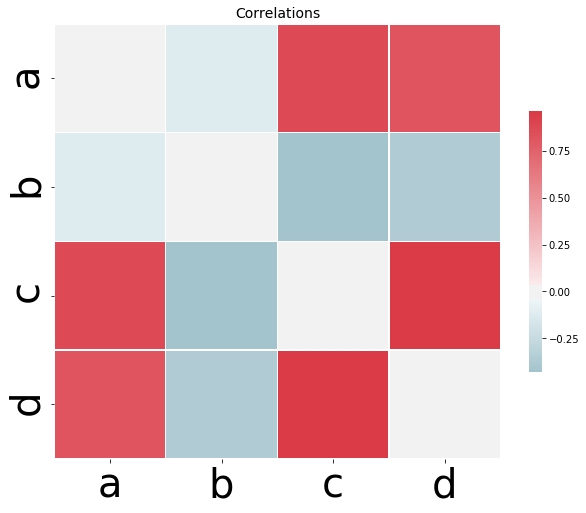

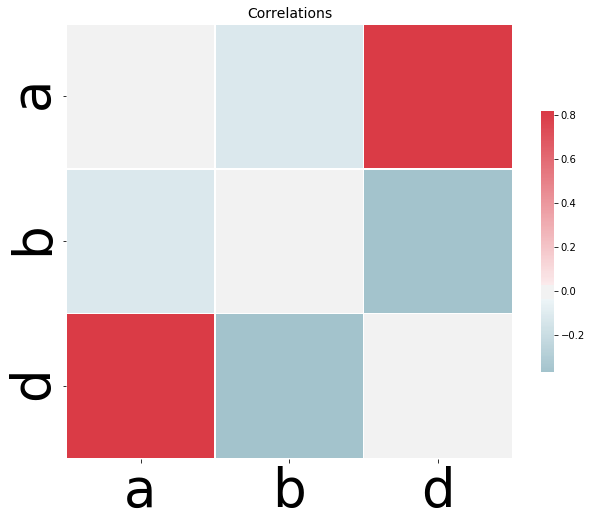

['a', 'b', 'd']

In [7]:
corr.fit(z)

In [8]:
corr=coherence_selection.Corr_Select(iv=1,method=1, CorrLimit=0.7, plot=1)

['a', 'b', 'c', 'd']


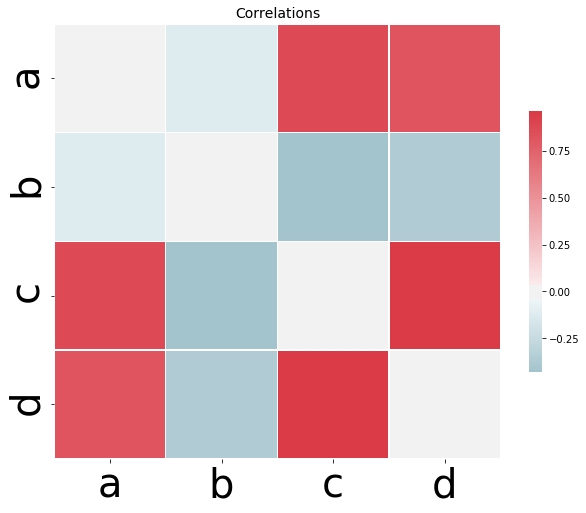

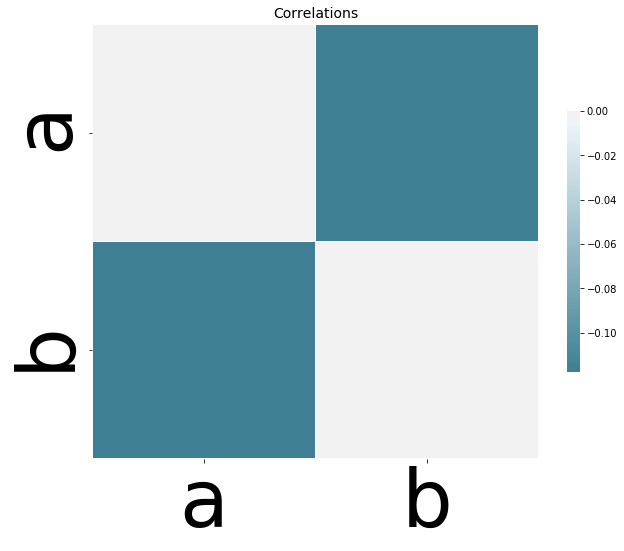

['a', 'b']

In [9]:
corr.fit(X,'lable')

# 利用Sklearn 包内的方法进行

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
estimator=LogisticRegression()

In [21]:
clf=sklearn_fs.RFE_Select(estimator, n_features_to_select=3, step=1, verbose=0)

In [22]:
clf.fit(x,y)

RFE_Select(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
      n_features_to_select=3, step=1, verbose=0)

In [27]:
clf.support_

array([False,  True,  True,  True])

In [28]:
clf=sklearn_fs.F_class_Select(k=2)

In [31]:
clf.fit(z,y)